In [1]:
import pandas as pd
import glob
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Path to the folder containing the CSV files
path = "vital_data/"

# Read the ICU days dataframe
case_df = pd.read_csv("https://api.vitaldb.net/cases")  # Adjust the filename as necessary

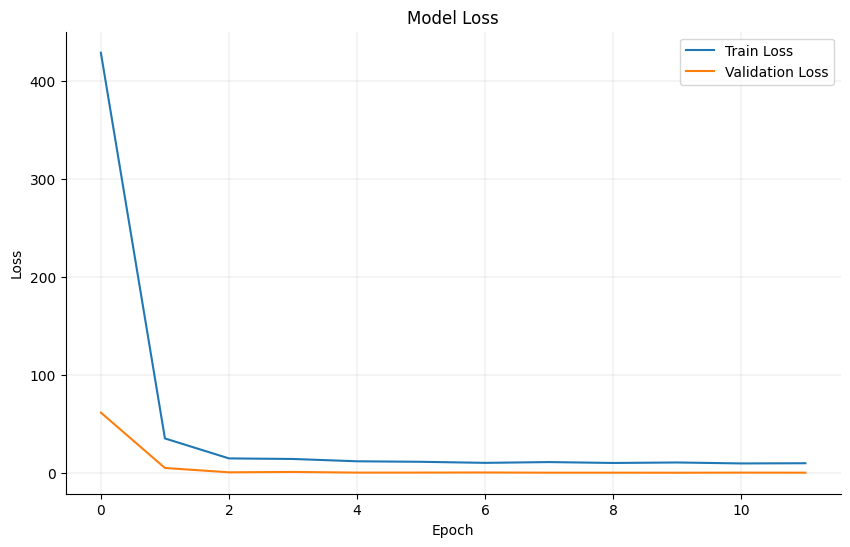

In [6]:
# load history_dict from file
import pickle
with open('history_dict', 'rb') as f:
    history = pickle.load(f)

# Plot training & validation loss values
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(history["loss"], label="Train Loss")
plt.plot(history["val_loss"], label="Validation Loss")
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(loc="upper right")

#remove top and right borders
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# add grid
plt.grid(color='gray', linestyle='-', linewidth=0.25, alpha=0.5)

plt.show()


In [4]:


# # take random 250 cases
# icu_days_df = case_df.sample(n=250, random_state=42)

data_icu_greater1 = case_df[case_df["icu_days"] > 1]
# take random 40 caseids
caseids = data_icu_greater1["caseid"].unique()
np.random.seed(42)
np.random.shuffle(caseids)
caseids = caseids[:200]
data_icu_greater1 = data_icu_greater1[data_icu_greater1["caseid"].isin(caseids)]

# only take data with icu_days <= 1
data_icu_smaller1 = case_df[case_df["icu_days"] <= 1]
# take random 40 caseids
caseids = data_icu_smaller1["caseid"].unique()
np.random.seed(42)
np.random.shuffle(caseids)
caseids = caseids[:200]
data_icu_smaller1 = data_icu_smaller1[data_icu_smaller1["caseid"].isin(caseids)]


# Combine the two datasets
icu_days_df = pd.concat([data_icu_greater1, data_icu_smaller1])

In [5]:
# Read all case CSV files
all_files = glob.glob(path + "case_*.csv")

# Create a dictionary to hold the dataframes
case_data = {}
for filename in all_files:
    caseid = int(filename.split("_")[-1].split(".")[0])  # Extract caseid from filename
    # only take the caseid that is in the icu_days_df
    if caseid not in icu_days_df["caseid"].values:
        continue
    df = pd.read_csv(filename)
    # add caseid to the dataframe
    df["caseid"] = caseid
    case_data[caseid] = df
    # drop first 40 rows and last 40 rows
    case_data[caseid] = case_data[caseid].iloc[300:-200]
    # drop every 2nd row
    case_data[caseid] = case_data[caseid].iloc[::2].reset_index(drop=True)


In [6]:
# Merge all data into a single dataframe
all_data = pd.concat(case_data.values(), ignore_index=True)

In [7]:


# Merge with icu_days_df
merged_data = pd.merge(all_data, icu_days_df, on='caseid')


# save the merged data
merged_data.to_csv("merged_data.csv", index=False)

# Select relevant columns
columns = [
    'SNUADC/ART', 'SNUADC/CVP', 'SNUADC/ECG_II', 'SNUADC/ECG_V5', 'SNUADC/FEM', 'SNUADC/PLETH',
    'Solar8000/ART_DBP', 'Solar8000/ART_MBP', 'Solar8000/ART_SBP', 'Solar8000/BT', 'Solar8000/CVP',
    'Solar8000/ETCO2', 'Solar8000/FEM_DBP', 'Solar8000/FEM_MBP', 'Solar8000/FEM_SBP', 'Solar8000/FEO2',
    'Solar8000/FIO2', 'Solar8000/GAS2_EXPIRED', 'Solar8000/GAS2_INSPIRED', 'Solar8000/HR',
    'Solar8000/INCO2', 'Solar8000/NIBP_DBP', 'Solar8000/NIBP_MBP', 'Solar8000/NIBP_SBP', 'Solar8000/PA_DBP',
    'Solar8000/PA_MBP', 'Solar8000/PA_SBP', 'Solar8000/PLETH_HR', 'Solar8000/PLETH_SPO2', 'Solar8000/RR',
    'Solar8000/RR_CO2', 'Solar8000/ST_AVF', 'Solar8000/ST_AVL', 'Solar8000/ST_AVR', 'Solar8000/ST_I',
    'Solar8000/ST_II', 'Solar8000/ST_III', 'Solar8000/ST_V5', 'Solar8000/VENT_COMPL', 'Solar8000/VENT_INSP_TM',
    'Solar8000/VENT_MAWP', 'Solar8000/VENT_MEAS_PEEP', 'Solar8000/VENT_MV', 'Solar8000/VENT_PIP',
    'Solar8000/VENT_PPLAT', 'Solar8000/VENT_RR', 'Solar8000/VENT_SET_FIO2', 'Solar8000/VENT_SET_PCP',
    'Solar8000/VENT_SET_TV', 'Solar8000/VENT_TV', 'Primus/AWP', 'Primus/CO2', 'Primus/COMPLIANCE',
    'Primus/ETCO2', 'Primus/EXP_DES', 'Primus/EXP_SEVO', 'Primus/FEN2O', 'Primus/FEO2', 'Primus/FIN2O',
    'Primus/FIO2', 'Primus/FLOW_AIR', 'Primus/FLOW_N2O', 'Primus/FLOW_O2', 'Primus/INCO2', 'Primus/INSP_DES',
    'Primus/INSP_SEVO', 'Primus/MAC', 'Primus/MAWP_MBAR', 'Primus/MV', 'Primus/PAMB_MBAR', 'Primus/PEEP_MBAR',
    'Primus/PIP_MBAR', 'Primus/PPLAT_MBAR', 'Primus/RR_CO2', 'Primus/SET_FIO2',
    'Primus/SET_FLOW_TRIG', 'Primus/SET_FRESH_FLOW', 'Primus/SET_INSP_PAUSE', 'Primus/SET_INSP_PRES',
    'Primus/SET_INSP_TM', 'Primus/SET_INTER_PEEP', 'Primus/SET_PIP', 'Primus/SET_RR_IPPV', 'Primus/SET_TV_L',
    'Primus/TV', 'Orchestra/AMD_RATE', 'Orchestra/AMD_VOL', 'Orchestra/DEX2_RATE',
    'Orchestra/DEX2_VOL', 'Orchestra/DEX4_RATE', 'Orchestra/DEX4_VOL', 'Orchestra/DOBU_RATE', 'Orchestra/DOBU_VOL',
    'Orchestra/DOPA_RATE', 'Orchestra/DOPA_VOL', 'Orchestra/DTZ_RATE', 'Orchestra/DTZ_VOL', 'Orchestra/EPI_RATE',
    'Orchestra/EPI_VOL', 'Orchestra/FUT_RATE', 'Orchestra/FUT_VOL', 'Orchestra/MRN_RATE', 'Orchestra/MRN_VOL',
    'Orchestra/NEPI_RATE', 'Orchestra/NEPI_VOL', 'Orchestra/NPS_RATE', 'Orchestra/NPS_VOL', 'Orchestra/NTG_RATE',
    'Orchestra/NTG_VOL', 'Orchestra/OXY_RATE', 'Orchestra/OXY_VOL', 'Orchestra/PGE1_RATE', 'Orchestra/PGE1_VOL',
    'Orchestra/PHEN_RATE', 'Orchestra/PHEN_VOL', 'Orchestra/PPF20_CE', 'Orchestra/PPF20_CP', 'Orchestra/PPF20_CT',
    'Orchestra/PPF20_RATE', 'Orchestra/PPF20_VOL', 'Orchestra/RFTN20_CE', 'Orchestra/RFTN20_CP', 'Orchestra/RFTN20_CT',
    'Orchestra/RFTN20_RATE', 'Orchestra/RFTN20_VOL', 'Orchestra/RFTN50_CE', 'Orchestra/RFTN50_CP', 'Orchestra/RFTN50_CT',
    'Orchestra/RFTN50_RATE', 'Orchestra/RFTN50_VOL', 'Orchestra/ROC_RATE', 'Orchestra/ROC_VOL', 'Orchestra/VASO_RATE',
    'Orchestra/VASO_VOL', 'Orchestra/VEC_RATE', 'Orchestra/VEC_VOL', 'BIS/BIS', 'BIS/EEG1_WAV', 'BIS/EEG2_WAV',
    'BIS/EMG', 'BIS/SEF', 'BIS/SQI', 'BIS/SR', 'BIS/TOTPOW', 'Invos/SCO2_L', 'Invos/SCO2_R', 'Vigileo/CI', 'Vigileo/CO',
    'Vigileo/SV', 'Vigileo/SVI', 'Vigileo/SVV', 'EV1000/ART_MBP', 'EV1000/CI', 'EV1000/CO', 'EV1000/CVP', 'EV1000/SV',
    'EV1000/SVI', 'EV1000/SVR', 'EV1000/SVRI', 'EV1000/SVV', 'Vigilance/BT_PA', 'Vigilance/CI', 'Vigilance/CO',
    'Vigilance/EDV', 'Vigilance/EDVI', 'Vigilance/ESV', 'Vigilance/ESVI', 'Vigilance/HR_AVG', 'Vigilance/RVEF',
    'Vigilance/SNR', 'Vigilance/SQI', 'Vigilance/SV', 'Vigilance/SVI', 'Vigilance/SVO2', 'CardioQ/ABP', 'CardioQ/FLOW',
    'CardioQ/CI', 'CardioQ/CO', 'CardioQ/FTc', 'CardioQ/FTp', 'CardioQ/HR', 'CardioQ/MA', 'CardioQ/MD', 'CardioQ/PV',
    'CardioQ/SD', 'CardioQ/SV', 'CardioQ/SVI', 'FMS/FLOW_RATE', 'FMS/INPUT_AMB_TEMP', 'FMS/INPUT_TEMP', 'FMS/OUTPUT_AMB_TEMP',
    'FMS/OUTPUT_TEMP', 'FMS/PRESSURE', 'FMS/TOTAL_VOL', 'icu_days', 'caseid'
]


existing_columns = [col for col in columns if col in merged_data.columns]
missing_columns = [col for col in columns if col not in merged_data.columns]

print(f"Missing columns: {missing_columns}")
print(f"Existing columns: {existing_columns}")
# save existing columns as npy
np.save("existing_columns.npy", existing_columns)


data = merged_data[existing_columns]

# Handle missing values
data = data.fillna(method='ffill').fillna(method='bfill')

# Save the data
data.to_csv("preprocessed_data.csv", index=False)



Missing columns: ['SNUADC/ART', 'SNUADC/CVP', 'SNUADC/ECG_V5', 'SNUADC/FEM', 'Solar8000/ART_DBP', 'Solar8000/ART_MBP', 'Solar8000/ART_SBP', 'Solar8000/BT', 'Solar8000/CVP', 'Solar8000/FEM_DBP', 'Solar8000/FEM_MBP', 'Solar8000/FEM_SBP', 'Solar8000/GAS2_EXPIRED', 'Solar8000/GAS2_INSPIRED', 'Solar8000/NIBP_DBP', 'Solar8000/NIBP_MBP', 'Solar8000/NIBP_SBP', 'Solar8000/PA_DBP', 'Solar8000/PA_MBP', 'Solar8000/PA_SBP', 'Solar8000/RR', 'Solar8000/ST_AVF', 'Solar8000/ST_AVL', 'Solar8000/ST_AVR', 'Solar8000/ST_I', 'Solar8000/ST_II', 'Solar8000/ST_III', 'Solar8000/ST_V5', 'Solar8000/VENT_COMPL', 'Solar8000/VENT_INSP_TM', 'Solar8000/VENT_MEAS_PEEP', 'Solar8000/VENT_PIP', 'Solar8000/VENT_PPLAT', 'Solar8000/VENT_RR', 'Solar8000/VENT_SET_FIO2', 'Solar8000/VENT_SET_PCP', 'Solar8000/VENT_SET_TV', 'Solar8000/VENT_TV', 'Primus/EXP_DES', 'Primus/EXP_SEVO', 'Primus/FLOW_AIR', 'Primus/FLOW_N2O', 'Primus/FLOW_O2', 'Primus/INSP_DES', 'Primus/INSP_SEVO', 'Primus/PEEP_MBAR', 'Primus/PPLAT_MBAR', 'Primus/SET_FLOW

/var/folders/4x/bz2824s146n10c63_0mz1y840000gn/T/ipykernel_88353/1246674356.py:61: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.fillna(method='ffill').fillna(method='bfill')


In [5]:
print(f'X_train shape: {X_train.shape}')  # Expected shape: (number of samples, sequence_length, number of features)
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')  # Expected shape: (number of samples,)
print(f'y_test shape: {y_test.shape}')

X_train shape: (943487, 100, 31)
X_test shape: (235872, 100, 31)
y_train shape: (943487,)
y_test shape: (235872,)


In [8]:
# import model icu_model.h5
from tensorflow.keras.models import load_model
from sklearn.model_selection import train_test_split
import pickle

# import icu_model.h5 and history_dict
existing_columns = np.load("existing_columns.npy")

model = load_model('my_model.keras')

history = pickle.load(open('history_dict', "rb"))
# Load the sequences and targets
X = np.load("X.npy")
y = np.load("y.npy")

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
# Check for NaN values in the sequences and targets
print(f"NaN values in X: {np.isnan(X).sum()}")
print(f"NaN values in y: {np.isnan(y).sum()}")

NaN values in X: 0
NaN values in y: 0


In [16]:
from sklearn.metrics import mean_squared_error
import numpy as np

def permutation_feature_importance(model, X, y, metric=mean_squared_error, n_repeats=10):
    baseline = metric(y, model.predict(X))
    importances = np.zeros(X.shape[2])

    for i in range(X.shape[2]):
        score_drops = []
        for _ in range(n_repeats):
            X_permuted = X.copy()
            np.random.shuffle(X_permuted[:, :, i])
            permuted_score = metric(y, model.predict(X_permuted))
            score_drops.append(permuted_score - baseline)
        importances[i] = np.mean(score_drops)
    
    return importances

# Calculate feature importances
importances = permutation_feature_importance(model, X_test, y_test)
sorted_indices = np.argsort(importances)[::-1]

# Print feature importances
for idx in sorted_indices:
    print(f"Feature: {existing_columns[idx]}, Importance: {importances[idx]}")

2146/2146 ━━━━━━━━━━━━━━━━━━━━ 27s 12ms/step
2146/2146 ━━━━━━━━━━━━━━━━━━━━ 26s 12ms/step
2146/2146 ━━━━━━━━━━━━━━━━━━━━ 26s 12ms/step
2146/2146 ━━━━━━━━━━━━━━━━━━━━ 27s 12ms/step
2146/2146 ━━━━━━━━━━━━━━━━━━━━ 26s 12ms/step
2146/2146 ━━━━━━━━━━━━━━━━━━━━ 26s 12ms/step
2146/2146 ━━━━━━━━━━━━━━━━━━━━ 26s 12ms/step
2146/2146 ━━━━━━━━━━━━━━━━━━━━ 26s 12ms/step
2146/2146 ━━━━━━━━━━━━━━━━━━━━ 26s 12ms/step
2146/2146 ━━━━━━━━━━━━━━━━━━━━ 26s 12ms/step
2146/2146 ━━━━━━━━━━━━━━━━━━━━ 26s 12ms/step
2146/2146 ━━━━━━━━━━━━━━━━━━━━ 26s 12ms/step
2146/2146 ━━━━━━━━━━━━━━━━━━━━ 26s 12ms/step
2146/2146 ━━━━━━━━━━━━━━━━━━━━ 27s 12ms/step
2146/2146 ━━━━━━━━━━━━━━━━━━━━ 27s 13ms/step
2146/2146 ━━━━━━━━━━━━━━━━━━━━ 27s 13ms/step
2146/2146 ━━━━━━━━━━━━━━━━━━━━ 27s 13ms/step
2146/2146 ━━━━━━━━━━━━━━━━━━━━ 27s 13ms/step
2146/2146 ━━━━━━━━━━━━━━━━━━━━ 27s 13ms/step
2146/2146 ━━━━━━━━━━━━━━━━━━━━ 27s 13ms/step
2146/2146 ━━━━━━━━━━━━━━━━━━━━ 27s 12ms/step
2146/2146 ━━━━━━━━━━━━━━━━━━━━ 27s 13ms/step
2146/2146 

In [16]:
# import shap

# # Create a SHAP explainer
# explainer = shap.DeepExplainer(model, X_train[:100])  # Use a subset of the training data to fit the explainer

# # Calculate SHAP values
# shap_values = explainer.shap_values(X_test[:100])  # Use a subset of the test data for the explanation

# # Plot summary plot
# shap.summary_plot(shap_values, X_test[:100], feature_names=existing_columns[:-2])

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

y_pred = model.predict(X_test)

# Plot the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual ICU Days')
plt.plot(y_pred, label='Predicted ICU Days')
plt.title('Actual vs Predicted ICU Days')
plt.xlabel('Sample')
plt.ylabel('ICU Days')
plt.legend(loc='upper right')
plt.show()

In [14]:
# get case with icu days = 2
case = case_df[case_df['icu_days'] == 2].iloc[1]
print(case)

caseid             44
subjectid        5052
casestart           0
caseend         14614
anestart        -1341
                ...  
intraop_vecu        0
intraop_eph        10
intraop_phe         0
intraop_epi         0
intraop_ca          0
Name: 43, Length: 74, dtype: object


In [22]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np

caseid = 44

# Load the CSV file for a single patient
patient_data = pd.read_csv(f"vital_data/case_{caseid}.csv")
# drop first and alst 40 rows
patient_data = patient_data.iloc[40:-40]

patient_data = patient_data.fillna(method='ffill').fillna(method='bfill')
# compare columns with existing_columns
#missing_columns = [col for col in patient_data.columns if col not in existing_columns]
#print(f"Missing columns: {missing_columns}")
# drop time
try:    
    patient_data = patient_data.drop(columns=["time"])
except: 
    pass

#get the icu days from icu_days_df for the caseid
icu_days = case_df[case_df["caseid"] == caseid]["icu_days"].values[0]
print("Actual ICU Days:", icu_days)
# Standardize the data
scaler = StandardScaler()
patient_data_scaled = scaler.fit_transform(patient_data)

# Convert to DataFrame to maintain column names
patient_data_scaled = pd.DataFrame(patient_data_scaled, columns=existing_columns[:-2])

print("Patient data loaded and standardized.")

# Create sequences function for a single patient
def create_patient_sequence(df, sequence_length):
    sequences = []
    if len(df) >= sequence_length:
        for i in range(len(df) - sequence_length):
            seq = df.iloc[i:i+sequence_length][existing_columns[:-2]].values
            sequences.append(seq)
    return np.array(sequences)

# Set the sequence length
sequence_length = 1000  # Use the same value as used during training

# Create the sequence
X_patient = create_patient_sequence(patient_data_scaled, sequence_length)

print(f"Patient sequence created: X_patient shape: {X_patient.shape}")

import tensorflow as tf

# Ensure that the sequence length and number of features match the model's expected input shape
if X_patient.shape[1:] == (sequence_length, len(existing_columns) - 2):
    # Make predictions
    y_pred_patient = model.predict(X_patient)
    print(y_pred_patient)
    # Average the predictions if multiple sequences were created
    predicted_icu_days = np.mean(y_pred_patient)
    print(f"Predicted ICU days for the patient: {predicted_icu_days}")
else:
    print("Error: The input sequence does not match the expected shape for the model.")

/var/folders/4x/bz2824s146n10c63_0mz1y840000gn/T/ipykernel_88353/922267338.py:12: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  patient_data = patient_data.fillna(method='ffill').fillna(method='bfill')


Actual ICU Days: 2
Patient data loaded and standardized.
Patient sequence created: X_patient shape: (13534, 1000, 30)
423/423 ━━━━━━━━━━━━━━━━━━━━ 33s 77ms/step
[[2.2535954 ]
 [2.2510667 ]
 [2.2384748 ]
 ...
 [0.14529228]
 [0.19171143]
 [0.27528572]]
Predicted ICU days for the patient: 2.0839741230010986


In [26]:
#from timeseries_predict import predict_icu_days_from_data

caseid = 44

# Load the CSV file for a single patient
patient_data = pd.read_csv(f"vital_data/case_{caseid}.csv")
# get the icu days from icu_days_df for the caseid
icu_days = case_df[case_df["caseid"] == caseid]["icu_days"].values[0]
print("Actual ICU Days:", icu_days)

#predict_icu_days_from_data(patient_data=patient_data)

Actual ICU Days: 2


In [36]:

# show all values
pd.set_option('display.max_columns', None)
print(case_df[case_df["caseid"] == caseid])

      caseid  subjectid  casestart  caseend  anestart   aneend  opstart  \
3008    3009       4404          0    16821      -647  16153.0     2653   

      opend     adm     dis  icu_days  death_inhosp   age sex  height  weight  \
3008  15853 -201000  576600         3             0  63.0   F   147.0    54.0   

       bmi  asa  emop       department   optype                    dx  \
3008  25.0  1.0     0  General surgery  Stomach  Early gastric cancer   

                  opname     approach position ane_type  preop_htn  preop_dm  \
3008  Distal gastrectomy  Videoscopic   Supine  General          0         0   

                preop_ecg preop_pft  preop_hb  preop_plt  preop_pt  \
3008  Normal Sinus Rhythm    Normal      11.8      232.0     104.0   

      preop_aptt  preop_na  preop_k  preop_gluc  preop_alb  preop_ast  \
3008        29.6     141.0      4.4       105.0        3.7       17.0   

      preop_alt  preop_bun  preop_cr  preop_ph  preop_hco3  preop_be  \
3008       15.0   

In [27]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
from tensorflow.keras.models import load_model


def predict_icu_days_from_data(patient_data) -> float:
    # import icu_model.h5 and history_dict
    existing_columns = np.load("existing_columns.npy")

    model = load_model("lstm_model.keras")
    # drop first and alst 40 rows
    patient_data = patient_data.iloc[200:-40]

    patient_data = patient_data.fillna(method="ffill").fillna(method="bfill")
    # compare columns with existing_columns
    # missing_columns = [col for col in patient_data.columns if col not in existing_columns]
    # print(f"Missing columns: {missing_columns}")
    # drop time
    try:
        patient_data = patient_data.drop(columns=["time"])
    except:
        pass

    # Standardize the data
    scaler = StandardScaler()
    patient_data_scaled = scaler.fit_transform(patient_data)

    # Convert to DataFrame to maintain column names
    patient_data_scaled = pd.DataFrame(patient_data_scaled, columns=existing_columns[:-2])

    print("Patient data loaded and standardized.")

    # Create sequences function for a single patient
    def create_patient_sequence(df, sequence_length):
        sequences = []
        if len(df) >= sequence_length:
            for i in range(len(df) - sequence_length):
                seq = df.iloc[i : i + sequence_length][existing_columns[:-2]].values
                sequences.append(seq)
        return np.array(sequences)

    # Set the sequence length
    sequence_length = 1000  # Use the same value as used during training

    # Create the sequence
    X_patient = create_patient_sequence(patient_data_scaled, sequence_length)

    print(f"Patient sequence created: X_patient shape: {X_patient.shape}")

    # Ensure that the sequence length and number of features match the model's expected input shape
    if X_patient.shape[1:] == (sequence_length, len(existing_columns) - 2):
        # Make predictions
        y_pred_patient = model.predict(X_patient)
        print(y_pred_patient)
        # Average the predictions if multiple sequences were created
        predicted_icu_days = np.mean(y_pred_patient)
        return predicted_icu_days
        print(f"Predicted ICU days for the patient: {predicted_icu_days}")
    else:
        print("Error: The input sequence does not match the expected shape for the model.")
        return None


In [29]:

icu_days = case = case_df[case_df['icu_days'] > 1]

# take 50 cases
caseids = icu_days["caseid"].unique()
np.random.seed(42)
np.random.shuffle(caseids)
caseids = caseids[:50]
icu_days = icu_days[icu_days["caseid"].isin(caseids)]

# Load the CSV files for the selected cases
case_data = {}
for caseid in caseids:
    try:
        df = pd.read_csv(f"vital_data/case_{caseid}.csv")
        # drop first and last 40 rows
        df = df.iloc[200:-40]
        # check if existing_columns are in the df else skip
        if not all(col in df.columns for col in existing_columns[:-2]):
            continue
        case_data[caseid] = df
    except FileNotFoundError:
        print(f"File not found for case {caseid}")

# predict icu days for each case
predicted_icu_days = {}
actual_icu_days = []

for caseid, df in case_data.items():
    predicted_icu_days[caseid] = predict_icu_days_from_data(df)
    actual_icu_days.append(case_df[case_df["caseid"] == caseid]["icu_days"].values[0])



File not found for case 6246
File not found for case 6337
File not found for case 5550


/var/folders/4x/bz2824s146n10c63_0mz1y840000gn/T/ipykernel_88353/3259289950.py:15: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  patient_data = patient_data.fillna(method="ffill").fillna(method="bfill")


Patient data loaded and standardized.
Patient sequence created: X_patient shape: (27397, 1000, 30)
857/857 ━━━━━━━━━━━━━━━━━━━━ 67s 78ms/step
[[25.853006]
 [24.379234]
 [22.473684]
 ...
 [42.172997]
 [42.17299 ]
 [42.17298 ]]
Patient data loaded and standardized.


/var/folders/4x/bz2824s146n10c63_0mz1y840000gn/T/ipykernel_88353/3259289950.py:15: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  patient_data = patient_data.fillna(method="ffill").fillna(method="bfill")


Patient sequence created: X_patient shape: (4302, 1000, 30)
135/135 ━━━━━━━━━━━━━━━━━━━━ 11s 79ms/step
[[1.5661368]
 [1.535739 ]
 [1.5666609]
 ...
 [0.9569073]
 [1.0192337]
 [1.0348749]]
Patient data loaded and standardized.


/var/folders/4x/bz2824s146n10c63_0mz1y840000gn/T/ipykernel_88353/3259289950.py:15: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  patient_data = patient_data.fillna(method="ffill").fillna(method="bfill")


Patient sequence created: X_patient shape: (17614, 1000, 30)
551/551 ━━━━━━━━━━━━━━━━━━━━ 43s 78ms/step
[[4.5425005]
 [4.5565305]
 [4.534535 ]
 ...
 [2.8587532]
 [2.8600535]
 [2.8554845]]
Patient data loaded and standardized.


/var/folders/4x/bz2824s146n10c63_0mz1y840000gn/T/ipykernel_88353/3259289950.py:15: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  patient_data = patient_data.fillna(method="ffill").fillna(method="bfill")


Patient sequence created: X_patient shape: (10970, 1000, 30)
343/343 ━━━━━━━━━━━━━━━━━━━━ 27s 79ms/step
[[ 4.1162596]
 [ 4.094187 ]
 [ 4.089755 ]
 ...
 [42.298347 ]
 [41.972443 ]
 [41.826347 ]]
Patient data loaded and standardized.


/var/folders/4x/bz2824s146n10c63_0mz1y840000gn/T/ipykernel_88353/3259289950.py:15: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  patient_data = patient_data.fillna(method="ffill").fillna(method="bfill")


Patient sequence created: X_patient shape: (9591, 1000, 30)
300/300 ━━━━━━━━━━━━━━━━━━━━ 24s 79ms/step
[[0.81754684]
 [0.78308487]
 [0.79577446]
 ...
 [4.155921  ]
 [4.1596494 ]
 [4.1632195 ]]
Patient data loaded and standardized.


/var/folders/4x/bz2824s146n10c63_0mz1y840000gn/T/ipykernel_88353/3259289950.py:15: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  patient_data = patient_data.fillna(method="ffill").fillna(method="bfill")


Patient sequence created: X_patient shape: (4558, 1000, 30)
143/143 ━━━━━━━━━━━━━━━━━━━━ 12s 80ms/step
[[ 2.8007689]
 [ 2.7337275]
 [ 2.7499533]
 ...
 [43.16256  ]
 [43.161034 ]
 [43.161415 ]]
Patient data loaded and standardized.


/var/folders/4x/bz2824s146n10c63_0mz1y840000gn/T/ipykernel_88353/3259289950.py:15: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  patient_data = patient_data.fillna(method="ffill").fillna(method="bfill")


Patient sequence created: X_patient shape: (9552, 1000, 30)
299/299 ━━━━━━━━━━━━━━━━━━━━ 24s 79ms/step
[[-0.03193188]
 [ 0.04641724]
 [ 0.00527191]
 ...
 [ 0.71512604]
 [ 0.71553135]
 [ 0.7142544 ]]
Patient data loaded and standardized.


/var/folders/4x/bz2824s146n10c63_0mz1y840000gn/T/ipykernel_88353/3259289950.py:15: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  patient_data = patient_data.fillna(method="ffill").fillna(method="bfill")


Patient sequence created: X_patient shape: (7868, 1000, 30)
246/246 ━━━━━━━━━━━━━━━━━━━━ 20s 82ms/step
[[ 1.7432003 ]
 [ 1.7451887 ]
 [ 1.7291803 ]
 ...
 [-0.4303465 ]
 [-0.45070553]
 [-0.45374393]]
Patient data loaded and standardized.


/var/folders/4x/bz2824s146n10c63_0mz1y840000gn/T/ipykernel_88353/3259289950.py:15: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  patient_data = patient_data.fillna(method="ffill").fillna(method="bfill")


Patient sequence created: X_patient shape: (7482, 1000, 30)
234/234 ━━━━━━━━━━━━━━━━━━━━ 19s 80ms/step
[[43.114822  ]
 [43.52887   ]
 [42.75744   ]
 ...
 [-0.25440025]
 [-0.25470066]
 [-0.25387955]]
Patient data loaded and standardized.


/var/folders/4x/bz2824s146n10c63_0mz1y840000gn/T/ipykernel_88353/3259289950.py:15: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  patient_data = patient_data.fillna(method="ffill").fillna(method="bfill")


Patient sequence created: X_patient shape: (4383, 1000, 30)
137/137 ━━━━━━━━━━━━━━━━━━━━ 11s 80ms/step
[[ 0.42640018]
 [ 0.41410732]
 [ 0.48544598]
 ...
 [-0.01115704]
 [-0.01345444]
 [-0.01736736]]
Patient data loaded and standardized.


/var/folders/4x/bz2824s146n10c63_0mz1y840000gn/T/ipykernel_88353/3259289950.py:15: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  patient_data = patient_data.fillna(method="ffill").fillna(method="bfill")


Patient sequence created: X_patient shape: (35153, 1000, 30)
1099/1099 ━━━━━━━━━━━━━━━━━━━━ 87s 79ms/step
[[6.103927 ]
 [6.017592 ]
 [5.9179077]
 ...
 [4.4862375]
 [4.4857817]
 [4.492139 ]]
Patient data loaded and standardized.


/var/folders/4x/bz2824s146n10c63_0mz1y840000gn/T/ipykernel_88353/3259289950.py:15: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  patient_data = patient_data.fillna(method="ffill").fillna(method="bfill")


Patient sequence created: X_patient shape: (20051, 1000, 30)
627/627 ━━━━━━━━━━━━━━━━━━━━ 49s 79ms/step
[[ 9.6946716e-02]
 [ 6.4643860e-02]
 [-1.1157990e-03]
 ...
 [ 2.5630499e+01]
 [ 2.5603094e+01]
 [ 2.5639978e+01]]
Patient data loaded and standardized.


/var/folders/4x/bz2824s146n10c63_0mz1y840000gn/T/ipykernel_88353/3259289950.py:15: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  patient_data = patient_data.fillna(method="ffill").fillna(method="bfill")


Patient sequence created: X_patient shape: (18831, 1000, 30)
589/589 ━━━━━━━━━━━━━━━━━━━━ 47s 79ms/step
[[ 1.5481391]
 [ 1.5645175]
 [ 1.540031 ]
 ...
 [37.045784 ]
 [36.869827 ]
 [36.915302 ]]
Patient data loaded and standardized.


/var/folders/4x/bz2824s146n10c63_0mz1y840000gn/T/ipykernel_88353/3259289950.py:15: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  patient_data = patient_data.fillna(method="ffill").fillna(method="bfill")


Patient sequence created: X_patient shape: (16264, 1000, 30)
509/509 ━━━━━━━━━━━━━━━━━━━━ 41s 79ms/step
[[5.175046 ]
 [5.187273 ]
 [5.188982 ]
 ...
 [4.4704323]
 [4.3107862]
 [4.157527 ]]
Patient data loaded and standardized.


/var/folders/4x/bz2824s146n10c63_0mz1y840000gn/T/ipykernel_88353/3259289950.py:15: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  patient_data = patient_data.fillna(method="ffill").fillna(method="bfill")


Patient sequence created: X_patient shape: (16170, 1000, 30)
506/506 ━━━━━━━━━━━━━━━━━━━━ 41s 80ms/step
[[1.287097 ]
 [1.348937 ]
 [1.3524709]
 ...
 [3.9605474]
 [3.928876 ]
 [3.838458 ]]
Patient data loaded and standardized.


/var/folders/4x/bz2824s146n10c63_0mz1y840000gn/T/ipykernel_88353/3259289950.py:15: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  patient_data = patient_data.fillna(method="ffill").fillna(method="bfill")


Patient sequence created: X_patient shape: (9118, 1000, 30)
285/285 ━━━━━━━━━━━━━━━━━━━━ 22s 78ms/step
[[0.59208584]
 [0.6178551 ]
 [0.6177368 ]
 ...
 [4.034341  ]
 [4.0212536 ]
 [4.0007653 ]]
Patient data loaded and standardized.


/var/folders/4x/bz2824s146n10c63_0mz1y840000gn/T/ipykernel_88353/3259289950.py:15: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  patient_data = patient_data.fillna(method="ffill").fillna(method="bfill")


Patient sequence created: X_patient shape: (8784, 1000, 30)
275/275 ━━━━━━━━━━━━━━━━━━━━ 23s 81ms/step
[[ 3.6478043e-03]
 [ 2.3111343e-02]
 [-5.3314209e-02]
 ...
 [ 3.7259098e+01]
 [ 3.7370972e+01]
 [ 3.7330742e+01]]
Patient data loaded and standardized.


/var/folders/4x/bz2824s146n10c63_0mz1y840000gn/T/ipykernel_88353/3259289950.py:15: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  patient_data = patient_data.fillna(method="ffill").fillna(method="bfill")


Patient sequence created: X_patient shape: (17257, 1000, 30)
540/540 ━━━━━━━━━━━━━━━━━━━━ 43s 80ms/step
[[42.208466 ]
 [42.33902  ]
 [42.20954  ]
 ...
 [ 1.5450406]
 [ 1.549623 ]
 [ 1.5529156]]
Patient data loaded and standardized.


/var/folders/4x/bz2824s146n10c63_0mz1y840000gn/T/ipykernel_88353/3259289950.py:15: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  patient_data = patient_data.fillna(method="ffill").fillna(method="bfill")


Patient sequence created: X_patient shape: (14626, 1000, 30)
458/458 ━━━━━━━━━━━━━━━━━━━━ 36s 79ms/step
[[ 2.3929024 ]
 [ 2.3432798 ]
 [ 2.3587255 ]
 ...
 [-0.580966  ]
 [-0.40979195]
 [-0.5565214 ]]
Patient data loaded and standardized.


/var/folders/4x/bz2824s146n10c63_0mz1y840000gn/T/ipykernel_88353/3259289950.py:15: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  patient_data = patient_data.fillna(method="ffill").fillna(method="bfill")


Patient sequence created: X_patient shape: (4274, 1000, 30)
134/134 ━━━━━━━━━━━━━━━━━━━━ 11s 80ms/step
[[ 1.8326426]
 [ 1.8760958]
 [ 1.7192864]
 ...
 [39.145782 ]
 [38.95405  ]
 [38.73657  ]]
Patient data loaded and standardized.


/var/folders/4x/bz2824s146n10c63_0mz1y840000gn/T/ipykernel_88353/3259289950.py:15: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  patient_data = patient_data.fillna(method="ffill").fillna(method="bfill")


Patient sequence created: X_patient shape: (5700, 1000, 30)
179/179 ━━━━━━━━━━━━━━━━━━━━ 14s 79ms/step
[[1.7527022 ]
 [1.8192649 ]
 [1.8512888 ]
 ...
 [0.190588  ]
 [0.15859127]
 [0.12279224]]
Patient data loaded and standardized.


/var/folders/4x/bz2824s146n10c63_0mz1y840000gn/T/ipykernel_88353/3259289950.py:15: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  patient_data = patient_data.fillna(method="ffill").fillna(method="bfill")


Patient sequence created: X_patient shape: (15972, 1000, 30)
500/500 ━━━━━━━━━━━━━━━━━━━━ 39s 77ms/step
[[12.140787 ]
 [11.872772 ]
 [11.592588 ]
 ...
 [ 4.5989847]
 [ 4.5990047]
 [ 4.5994854]]
Patient data loaded and standardized.


/var/folders/4x/bz2824s146n10c63_0mz1y840000gn/T/ipykernel_88353/3259289950.py:15: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  patient_data = patient_data.fillna(method="ffill").fillna(method="bfill")


Patient sequence created: X_patient shape: (7943, 1000, 30)
249/249 ━━━━━━━━━━━━━━━━━━━━ 20s 79ms/step
[[2.133915  ]
 [2.131709  ]
 [2.1206431 ]
 ...
 [0.046875  ]
 [0.04682732]
 [0.04630184]]
Patient data loaded and standardized.


/var/folders/4x/bz2824s146n10c63_0mz1y840000gn/T/ipykernel_88353/3259289950.py:15: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  patient_data = patient_data.fillna(method="ffill").fillna(method="bfill")


Patient sequence created: X_patient shape: (15586, 1000, 30)
488/488 ━━━━━━━━━━━━━━━━━━━━ 38s 77ms/step
[[3.3022814 ]
 [3.304618  ]
 [3.2663116 ]
 ...
 [0.43146038]
 [0.41304302]
 [0.40755463]]
Patient data loaded and standardized.


/var/folders/4x/bz2824s146n10c63_0mz1y840000gn/T/ipykernel_88353/3259289950.py:15: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  patient_data = patient_data.fillna(method="ffill").fillna(method="bfill")


Patient sequence created: X_patient shape: (10436, 1000, 30)
327/327 ━━━━━━━━━━━━━━━━━━━━ 26s 79ms/step
[[ 4.1651974]
 [ 4.1206675]
 [ 4.1189666]
 ...
 [45.29512  ]
 [45.29409  ]
 [45.29663  ]]
Patient data loaded and standardized.


/var/folders/4x/bz2824s146n10c63_0mz1y840000gn/T/ipykernel_88353/3259289950.py:15: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  patient_data = patient_data.fillna(method="ffill").fillna(method="bfill")


Patient sequence created: X_patient shape: (5113, 1000, 30)
160/160 ━━━━━━━━━━━━━━━━━━━━ 13s 78ms/step
[[ 3.5270314 ]
 [ 3.4565277 ]
 [ 3.4221106 ]
 ...
 [-0.8186588 ]
 [-0.79703045]
 [-0.80676174]]
Patient data loaded and standardized.


/var/folders/4x/bz2824s146n10c63_0mz1y840000gn/T/ipykernel_88353/3259289950.py:15: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  patient_data = patient_data.fillna(method="ffill").fillna(method="bfill")


Patient sequence created: X_patient shape: (9423, 1000, 30)
295/295 ━━━━━━━━━━━━━━━━━━━━ 23s 79ms/step
[[0.09057426]
 [0.16176796]
 [0.31259918]
 ...
 [3.7519603 ]
 [3.7342367 ]
 [3.722435  ]]
Patient data loaded and standardized.


/var/folders/4x/bz2824s146n10c63_0mz1y840000gn/T/ipykernel_88353/3259289950.py:15: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  patient_data = patient_data.fillna(method="ffill").fillna(method="bfill")


Patient sequence created: X_patient shape: (15342, 1000, 30)
480/480 ━━━━━━━━━━━━━━━━━━━━ 38s 79ms/step
[[0.1452198 ]
 [0.20967293]
 [0.16592598]
 ...
 [0.11593723]
 [0.11641121]
 [0.11611652]]


KeyError: 4556

In [33]:
# Ensure predicted and actual values are of the same length
predicted_values = []
actual_values = []
for caseid in predicted_icu_days:
    if not np.isnan(predicted_icu_days[caseid]):
        predicted_values.append(predicted_icu_days[caseid])
        actual_values.append(case_df[case_df["caseid"] == caseid]["icu_days"].values[0])
        print(f"Case ID: {caseid}, Predicted ICU Days: {predicted_icu_days[caseid]}, Actual ICU Days: {actual_values[-1]}")

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(actual_values, predicted_values)
print(f"Mean Squared Error: {mse}")

# Calculate Accuracy (using a threshold, e.g., absolute error within 1 day as accurate)
accuracy_threshold = 1
accurate_predictions = [1.5 if abs(pred - actual) <= accuracy_threshold else 0 for pred, actual in zip(predicted_values, actual_values)]
accuracy = np.mean(accurate_predictions)
print(f"Accuracy: {accuracy * 100:.2f}%")

Case ID: 777, Predicted ICU Days: 3.693891763687134, Actual ICU Days: 3
Case ID: 5888, Predicted ICU Days: 2.513911247253418, Actual ICU Days: 2
Case ID: 3019, Predicted ICU Days: 3.226284980773926, Actual ICU Days: 3
Case ID: 2594, Predicted ICU Days: 4.717614650726318, Actual ICU Days: 6
Case ID: 1965, Predicted ICU Days: 3.249152898788452, Actual ICU Days: 2
Case ID: 2533, Predicted ICU Days: 7.437570095062256, Actual ICU Days: 2
Case ID: 4724, Predicted ICU Days: 3.1244616508483887, Actual ICU Days: 6
Case ID: 1001, Predicted ICU Days: 2.396219253540039, Actual ICU Days: 2
Case ID: 1957, Predicted ICU Days: 3.1858863830566406, Actual ICU Days: 6
Case ID: 268, Predicted ICU Days: 2.0246012210845947, Actual ICU Days: 4
Case ID: 1407, Predicted ICU Days: 2.2858574390411377, Actual ICU Days: 3
Case ID: 5, Predicted ICU Days: 2.0994701385498047, Actual ICU Days: 13
Case ID: 2584, Predicted ICU Days: 3.3587515354156494, Actual ICU Days: 2
Case ID: 2744, Predicted ICU Days: 3.929631710052